# **Data Exploration and Preparation**

In [6]:
# Import library

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import seaborn as sns

**Data Exploration and Preparation**

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [3]:
# Show shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-5-7ce2270d647d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


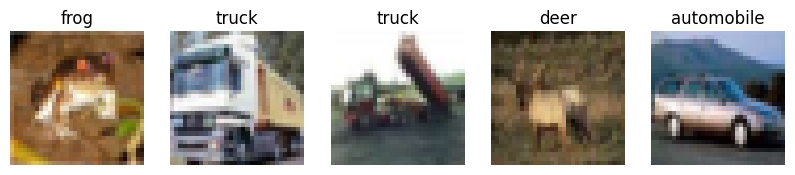

In [5]:
# Display 5 sample images with labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

**Normalize Images and Split Data**

In [7]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
# Check label distribution
print("Unique labels:", np.unique(y_train))
print("Label counts:", np.bincount(y_train))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label counts: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


# **Build and Train a CNN Model**

**Build CNN Model**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [11]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

**Compile and Train Model**

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=15, batch_size=64,
                    validation_split=0.2, verbose=1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.2760 - loss: 1.9404 - val_accuracy: 0.4792 - val_loss: 1.4282
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.4657 - loss: 1.4763 - val_accuracy: 0.5675 - val_loss: 1.2388
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.5152 - loss: 1.3510 - val_accuracy: 0.5910 - val_loss: 1.1740
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5469 - loss: 1.2633 - val_accuracy: 0.6112 - val_loss: 1.1412
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5749 - loss: 1.1927 - val_accuracy: 0.6296 - val_loss: 1.0655
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5952 - loss: 1.1458 - val_accuracy: 0.6534 - val_loss: 0.9934
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6086 - loss: 1.1055 - val_accuracy: 0.6682 - val_loss: 0.9726
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.6224 - loss: 1.0714 - 

**Plot Accuracy and Loss**

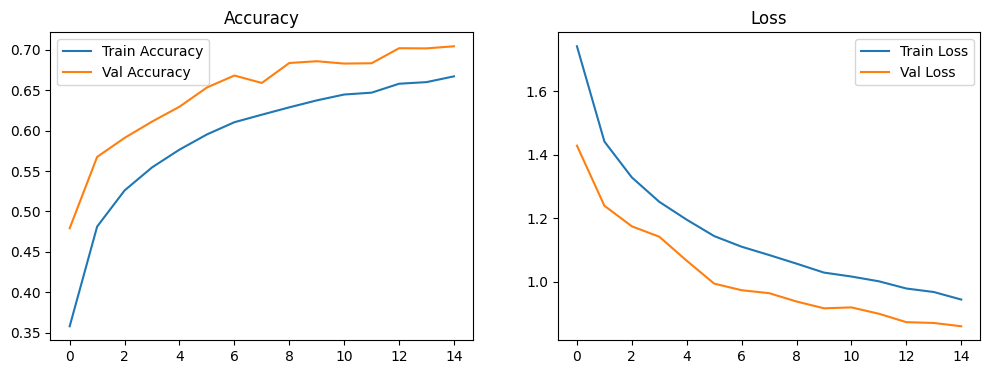

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

##  Comment: If the validation accuracy is much lower than training, overfitting is occurring. If both are low, the model might be underfitting.

# **Evaluate the Model**

**Evaluation on Test Set**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [18]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.8566
Test Accuracy: 0.7062000036239624


In [19]:
# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [20]:
# Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.79      0.69      0.74      1000
  automobile       0.86      0.81      0.83      1000
        bird       0.62      0.55      0.58      1000
         cat       0.52      0.50      0.51      1000
        deer       0.57      0.73      0.64      1000
         dog       0.61      0.61      0.61      1000
        frog       0.78      0.79      0.79      1000
       horse       0.76      0.74      0.75      1000
        ship       0.79      0.83      0.81      1000
       truck       0.78      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



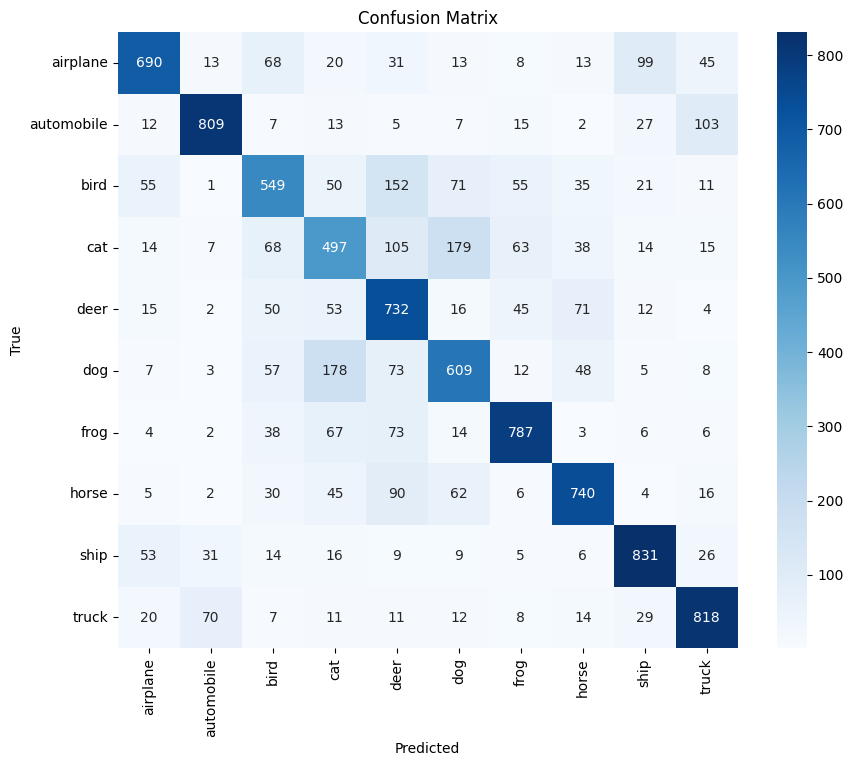

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Show the Examples**

In [22]:
# Show 5 correct and 5 incorrect predictions
correct = np.where(y_pred_classes == y_test)[0]
incorrect = np.where(y_pred_classes != y_test)[0]

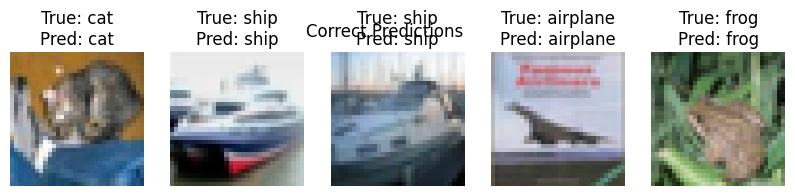

In [23]:
# Show correct examples
plt.figure(figsize=(10,2))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()

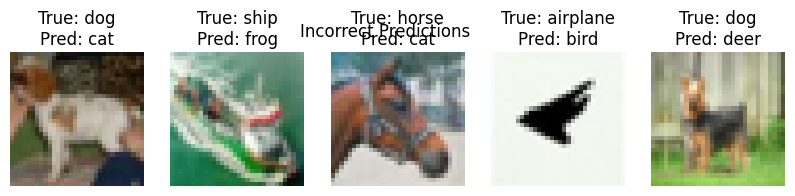

In [24]:
# Show incorrect examples
plt.figure(figsize=(10,2))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()

# **Model Improvement**

**Try a Different Optimizer**

In [25]:
# Build same model again
model_sgd = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile with SGD
from tensorflow.keras.optimizers import SGD
model_sgd.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train
history_sgd = model_sgd.fit(x_train, y_train_cat, epochs=15, batch_size=64,
                            validation_split=0.2, verbose=1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.1293 - loss: 2.2839 - val_accuracy: 0.2606 - val_loss: 2.0797
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.2319 - loss: 2.0729 - val_accuracy: 0.2979 - val_loss: 1.9717
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.2735 - loss: 1.9783 - val_accuracy: 0.3444 - val_loss: 1.8667
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.3131 - loss: 1.8903 - val_accuracy: 0.3847 - val_loss: 1.7518
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3509 - loss: 1.7892 - val_accuracy: 0.4157 - val_loss: 1.6591
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3761 - loss: 1.7072 - val_accuracy: 0.4436 - val_loss: 1.5802
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.3938 - loss: 1.6444 - val_accuracy: 0.4584 - val_loss: 1.5201
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.4201 - loss: 1.6004 - 

**Compare Performance**

In [28]:
# Evaluate SGD model
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test_cat)

# Comparison Table
print("Optimizer Comparison")
print(f"Adam Test Accuracy: {test_accuracy:.4f}")
print(f"SGD Test Accuracy: {test_acc_sgd:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5305 - loss: 1.3341
Optimizer Comparison
Adam Test Accuracy: 0.7062
SGD Test Accuracy: 0.5292
